In [ ]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

분류는 데이터가 어느 범주에 해당하는지 판단하는 문제로서 유사한 것들을 같은 범주로 묶으면 주변에서 일어나느 일을 빠르게 판단하는 데 도움이 된다.

분류에서는 같은 목적으로 예측이 정답을 얼마나 맞혓는지에 대한 정확도를 측정한다. 정확도는 보통 퍼센트로 나타난다.

## 이항 분류 (Binary Classification)

이항분류는 정답의 범주가 두개인 분류 문제다.

In [1]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

데이ㅌ 프레임은 행(row)과 열(column)로 구성된 데이터를 다루는 데이터 구조다. 각행 번호를 인덱스(index) 각 열의 이름을 속성(attribute)이라고 부른다.

데이터 프레임은 여러개의 행으로 구성되어있으며, head() 함수는 이 가운데 일부를 보여준다. head(10)을 입력하면 맨위에서부터 10개의 행을 출력하고, 인수를 넣지 않으면 자동으로 5개만 출력한다. 반대로 뒤에서 출력하고 싶으면 tail()을 쓰면 된다.

보스턴 주택 문제는 13개의 속성으로 주택 가격을 예측했고, 와인 분류 문제에서는 12개의 속성으로 와인의 종류를 분류한다.

In [ ]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

데이터 프레임에 새로운 속성을 추가하는 방법은 red['type'] = 0 처럼 데이터 프레임이 파이썬의 딕셔너리 타입인것처럼 속성명과 값을 직접 지정하면 된다. 여기서는 레드 화이트 와인을 구별하는 속성의 이름을 type으로 정의했고, 레드는 0 화이트는 1이다. 두 데이터를 합치기 위해 pd.concat()을 사용했다.

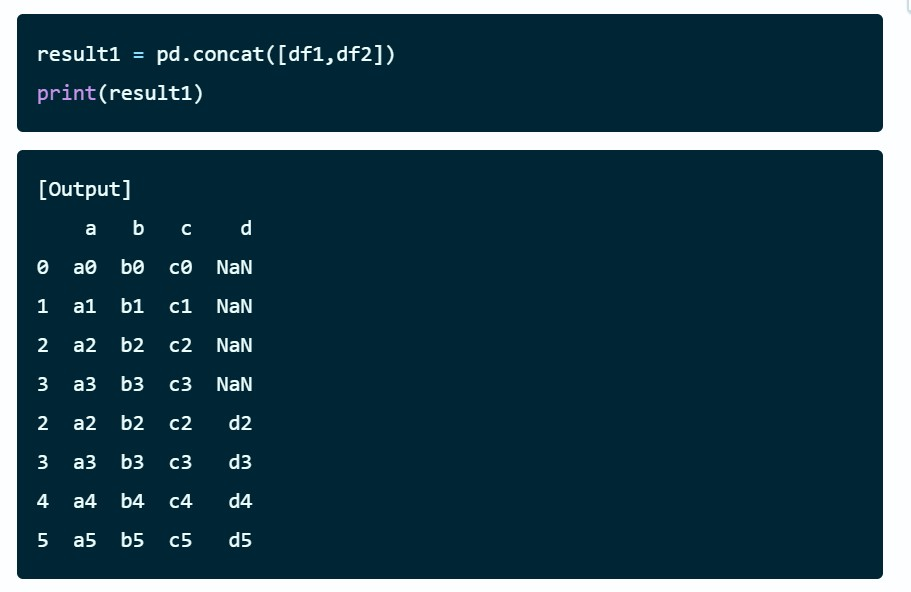

데이터가 잘 입력됫는지 확인하기 위해서는 describe()함수로 간단한 통계정보를 확인 할수있다. 가장 오른쪽의 type속성에서 최소값이 0 최대값이 1 로 나오는 걸 알수있다. 평균(mean)이 0.75가 나오는 것을 보면 0보다 1이 더 많을것을 짐작할수잇다.

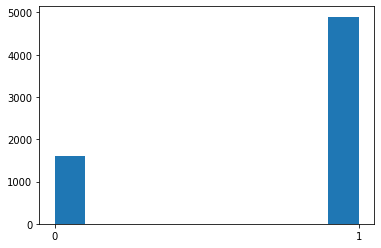

1    4898
0    1599
Name: type, dtype: int64


In [ ]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

정확한 수치를 알기위해 value_counts()함수로 type속성에 존재하는 각 값의 수를 출력하면 화이트가 레드보다 3배정도 많다.


딥러닝 학습을 위해 훈련데이터와 테스트 데이터로 나누기 전에 레드와 화이트를 비슷한 비율이 들어가도록 랜덤하게 섞어야 한다.
한쪽이 너무 많거나 적으면 섞기전에 일정한 비율의 데이터가 들어갈수 있도록 처리해야된다.

데이터를 섞기전에 데이터 정규화를 해야한다. 외부에서 불러오는 데이터의 경우 어떤 값이 구성돼 있는지 알기 어렵다. 이때 데이터 파악을 도와주는 것이 pandas의 info()함수다.

In [ ]:
# 5.4 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


info()함수는 데이터 프레임을 구성하는 속성들의 정보를 알려준다. 정규화 과정에서 데이터에 숫자가 아닌 값이 들어가면 에러의 원인이 된다.

출력된 13개의 속성 모두 non-null로 표시되어 null인 값은 하나도 들어있지 않다. 11개는 float64, 2개는 int64로 모두 숫자값이기 때문에 안전하게 정규화를 진행할수있다.

In [ ]:
# 5.5 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

min을 빼는 것은 0축으로 만들기 위해서 뺀다.

wine_norm = (wine - wine.min()) / (wine.max() - wine.min()) 에서 max(), min() 함수를 이용하여 각 속성의 최대 최소를 얻을수 있고, 이 값들을 이용해 모든 속성과 모든 행에 대한 계산이 가능하다.


나머지 두줄은 계산결과가 올바른지 확인하기위한 출력 명령문이다. describe()함수에서 볼 수 있는 속성들의 min이 모두 0, max가 모두 1인 것을 확인할수있다.

In [ ]:
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1) ## 표본을 뽑는다. frac=1 전체를 뽑겟다 0.5면 절반만 뽑는다.
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

NameError: ignored

판다스에서 sample()함수는 전체 데이터 프레임에서 frac인수로 지정된 비율만큼 행을 랜덤하게 뽑아서 만든다. frac=1로 지정했기 때문에 모든 데이터를 뽑아서 섞는 것과 동일하다.

첫번째 출력 결과에서 type을 보면 원래 레드와인이 앞에 있기 때문에 0.0만 다섯개가 나와야 하는데 랜덤이기 때문에 0과1이 섞였다. 
그다음에 나오는 to_numpy()함수는 데이터프레임을 넘파이array로 변환한다.

데이터를 훈련과 테스트로 나눈다. 검증데이터는 훈련에서 일부를 떼서 케라스에서 자동으로 만든다. 학습을 위해서 입력 출력인 X,Y로도 분리 해야한다.

In [ ]:
# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1] ## :-1인걸 빼고 저장하겟다 ## -1만 넣겟다
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.49586777 0.56666667 0.27108434 0.12269939 0.07142857 0.11458333
 0.41705069 0.2369385  0.31007752 0.20786517 0.31884058 0.16666667]
1.0
[0.19834711 0.14666667 0.19277108 0.01687117 0.03820598 0.10069444
 0.28571429 0.07692308 0.43410853 0.10674157 0.46376812 0.66666667]
1.0
[0. 1.]
[0. 1.]


여기까지 데이터 전처리

2행에서 80%에 해당하는 데이터를 train과 test로 만들기위해 wine_np의 수의 80%에 해당하는 인덱스 int값으로 저장한다. 그다음 인덱스를 이용해 wine_np를 분리한다. 넘파이 array에서는 2차원 이상의 인덱스에 접근할 때 쉼표를 사용하기 때문에 쉼표로 X,Y를 구분한다. 12개 기존속성은 X가 되고 새롭게 추가한 type은 Y가 된다.

tf.keras.utils에서 불러오는 to_categorical은 분류에서 자주쓰이는 함수다. 정답 행렬을 원-핫 인코딩 방식으로 바꾼다. 정답에는 1을 넣고 나머지 인덱스에는 0을 넣는다. num_classes는 정답 클래스의 개수다. 레드 화이트 2개를 넣었으니 2가 입력된다. 1의 위치는 정답 클래스의 인덱스와 동일하다.

In [ ]:
# 5.8 와인 데이터셋 분류 모델 생성
##모델정의
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
## 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_18 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


마지막 레이어의 활성화 함수로 소프트맥스를 사용했다. 이 함수는 출력값들을 자연 로그의 밑인 e의 지수로 사용한뒤 모두 더한 값을 나눈다. 결괏값의 총합은 1이다.

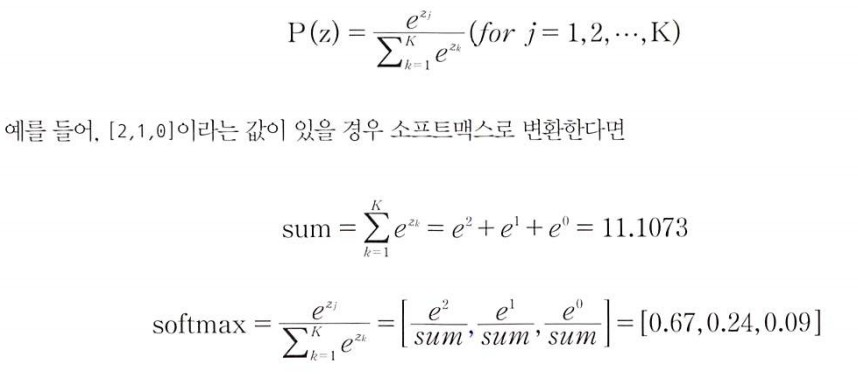

max함수와 비슷하게 큰값을 강조하고 작은값은 약화하는 효과를 가진다. e를 밑으로 하는 지수함수를 취하기 때문에 0이나 음수에도 적용이 가능하다.

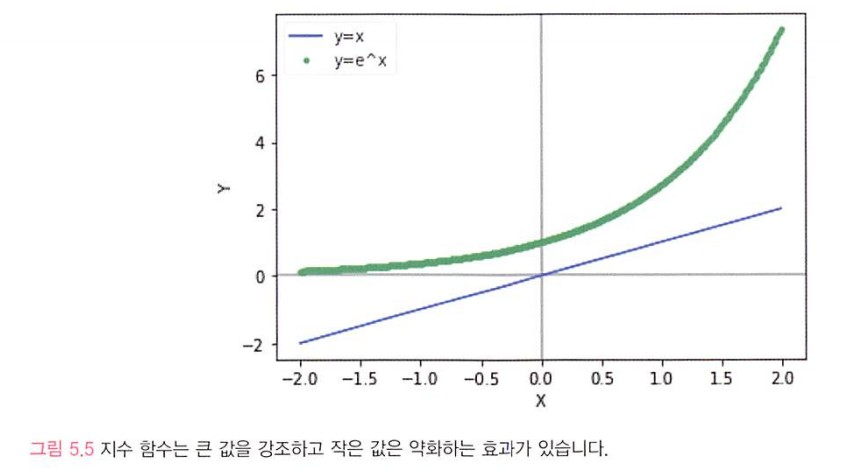

소프트맥스는 분류문제나 언어 RNN에서의 다음 토큰예측, 강화학습에서 에이전트의 행동 확률을 구하는 등 결괏값으로 확률이 필요한 다양한 분야에서 쓰인다.

뉴련의 개수가 2로 설정돼 있다는 점이다. 원-핫 인코딩으로 변환한 정답의 차원 수와 동일한 값이다. 정답이 [1,0]이면 100% 반대면 0% 예측률을 보이는 것이다. 마지막 와인까지 예측을 끝낸 뒤에 정답을 맞춘 수를 전체 와인의 수로 나누면 분류 네트워크의 예측률을 계산할 수 있다.|

손실함수인 loss에는 mse 대신 categorical_crossentropy라는 값을 넣었다. 크로스 엔트로피는 엔트로피의 기댓값과 비슷 하지만 약간 다르다.

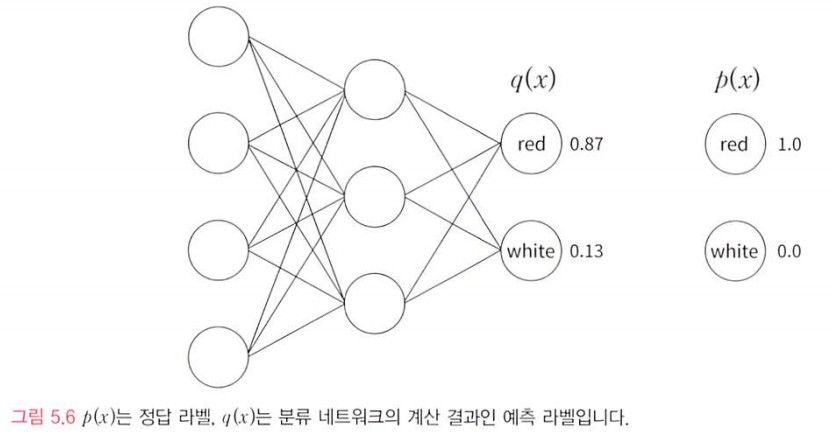

확률 부분에 p(x)를 곱하는 것과 달리 로그 뒤에는 q(x)를 곱한다. q(x)는 분류 네트워크가 예측한 라벨의 확률값이다.

p(x)와 q(x)에 해당하는 범주의 종류는 2개 이상이다. 이에 대한 해결책은 모든 범주에 대한 평균을 내는 것이다.

엔트로피의 기댓값은 평균이라 생각하면 된다.


*   A는 내일 뵙겠습니다.

*   B 내일부터 교수님이 못오십니다.
*   내일부터 있는 시험의 모든 점수를 A로 주고 과제도 없다.

구체적이고 생길일이 적기 때문에 놀라움이라 얘기한다.
놀라움을 줄이기위해 역수를 취한다.
로그는 단위를 줄여준다. 0과 1사이
확률값 대신 예측값과 기대값을 둘다 써서 크로스 엔트로피라 한다.



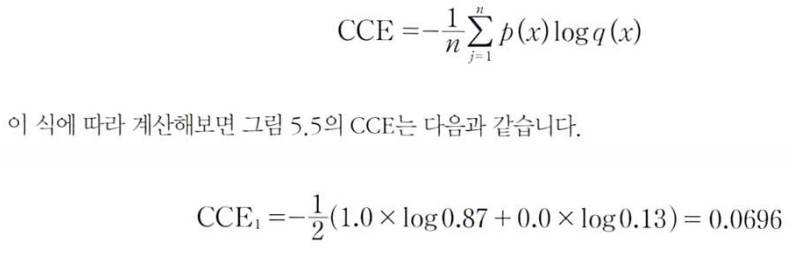

값만 보면 CCE가 높은지 낮은지 판단하기 어렵다. 정답이 화이트 와인일 때 레드 와인일 확률을 0.6 화이트 와인일 확률을 0.4로 예측할때를 계산한다.

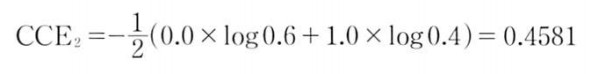

CCE수치는 0.4581로 0.696보다 6.5배 높다. CCE도 손실의 일종이기 때문에 낮을수록 좋다.

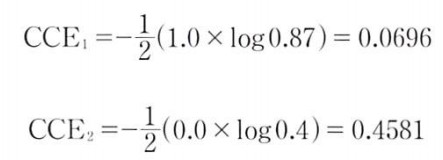

정답 라벨은 늘 1.0이고 오답은 0.0이기 때문에 오답 라벨에 곱해지는 값은 버려진다. 정답라벨에 관한 예측만 남겨도 값은 달라지지 않는다.

model.compile함수의 metrics인수에 정확도(accuracy)가 추가됐다. 분류 문제는 정확도로 퍼포먼스를 측정하기 때문에 정확도 설정은 필수다. 모델 학습 히스토리에 loss와 accuracy가 함께 저장된다.

In [ ]:
# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 6ms/step - loss: 0.1626 - accuracy: 0.9358 - val_loss: 0.3218 - val_accuracy: 0.9331
Epoch 2/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.9828 - val_loss: 0.1042 - val_accuracy: 0.9754
Epoch 3/25
122/122 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9826 - val_loss: 0.0726 - val_accuracy: 0.9815
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 0.9890 - val_loss: 0.1132 - val_accuracy: 0.9677
Epoch 5/25
122/122 [==============================] - 1s 4ms/step - loss: 0.0532 - accuracy: 0.9867 - val_loss: 0.0782 - val_accuracy: 0.9692
Epoch 6/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9910 - val_loss: 0.0783 - val_accuracy: 0.9762
Epoch 7/25
122/122 [==============================] - 1s 4ms/step - loss: 0.0403 - accuracy: 0.9892 - val_loss: 0.0492 - val_accuracy: 0.9877
Epoch 

학습 과정에서는 training 데이터의 정확도와 검증 데이터의 정확도가 가각 accuracy와 val_accuracy로 표시된다. 정확도가 100%에 가까울 수록 좋은 결과를 유지한다.

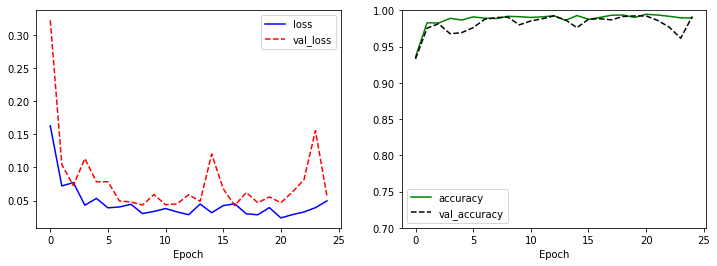

In [ ]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate()함수로 모델의 성능을 평가할 수있다. 함수의 인수로는 학습과정에서 본적 없는 테스트 데이터를 넣어준다.

In [ ]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y)

##loss와 정확도

41/41 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9938


[0.040841732174158096, 0.9938461780548096]

## 다항분류

범주의 수가 2개를 초과하는 경우다. 와인의 품질은 0에서 10까지 숫자로 구분돼 있기 때문에 다항분류로 사용할수있다.

In [ ]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


describe()함수로 통계 정보를 확이해 보면 레드와 화이트를 합친 wine데이터 에서 min값이 3, max값이 9인것을 확인할수있다. value_counts() 함수로 각 분류의 개수를 확인해 보면 각 항목의 수가 균일하지 않고 꽤 차이난다.

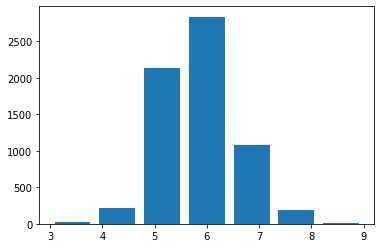

In [ ]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

데이터양이 적고 범주의 수가 많아서 각 데이터의 숫자가 차이가 난다. 모든범주에 대한 세세한 분류는 어렵다.

In [ ]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


데이터프레임에 쓰이는 loc는 특정한 데이터의 인덱스를 골라내는 역할을 한다. 대괄호 안에 인수를 하나만 넣으면 행을 골라내고 쉼표를 포함안 두개의 인수를 넣으면 행, 열을 골라낸다

In [ ]:
data = [['Apple',11],['Banana',23],['Coconut',35]]
df = pd.DataFrame(data, columns=['Fruit', 'Count'])
print(df)
print()
print(df.loc(0))
print()
print(df.loc[0,'Fruit'])

     Fruit  Count
0    Apple     11
1   Banana     23
2  Coconut     35


Apple


df.loc[0]은 첫번째 행을 선택하고 , df.loc[0,'Fruit']은 첫번째 행의 Fruit열을 선택한다.

예제 5.14 의 1행부터 3행까지는 와인 데이터세트의 품질이 5이하일경우, 6일경우, 7이상일 경우에 해당하느 ㄴ행을 선택한뒤, 'new_quality'라는 속성을 선택해 값을 추가한 것이다. 이때 기존 데이터 프레임에 'new_quality'라는 속성이 없으면 새로 만들어진다

value_counts()로 각 분류의 항목수를 살펴볼수있다. 각 항목을 구성하는 수가 너무 작거나 너무 많으면 분류가 잘 안되기 때문에 비슷하게 맞추는게 좋다.

In [ ]:
# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

1행에서 del wine[]이라는 명령으로 기존의 품질 속성을 삭제했다. 'new_quality'는 'quality'에서 나왓기 때문에 학습 데이터를 만들기 전에 이 속성을 삭제한다.

In [ ]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.9691 - accuracy: 0.5024 - val_loss: 0.8922 - val_accuracy: 0.5562
Epoch 2/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8966 - accuracy: 0.5417 - val_loss: 0.9154 - val_accuracy: 0.5246
Epoch 3/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8720 - accuracy: 0.5602 - val_loss: 0.8805 - val_accuracy: 0.5585
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8611 - accuracy: 0.5725 - val_loss: 0.8783 - val_accuracy: 0.5700
Epoch 5/25
122/122 [==============================] - 1s 4ms/step - loss: 0.8568 - accuracy: 0.5771 - val_loss: 0.8770 - val_accuracy: 0.5631
Epoch 6/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8496 - accuracy: 0.5802 - val_loss: 0.8829 - val_accuracy: 0.5669
Epoch 7/25
122/122 [==============================] - 0s 4ms/step - loss: 0.8517 - accuracy: 0.5727 - val_loss: 0.8715 - val_accuracy: 0.5585
Epoch 

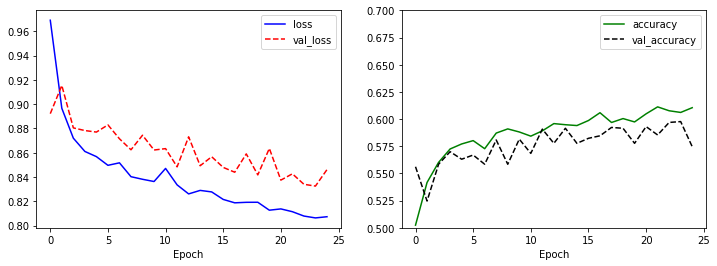

In [ ]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

학습을 계속하면 loss는 꾸준히 작아지겟지만, 훈련 데이터가 과적합 되기 때문에 val_loss는 증가하기 시작할것이다.

In [ ]:
# 5.18 다항 분류 모델 평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 3ms/step - loss: 0.8288 - accuracy: 0.5923


[0.8288469314575195, 0.5923076868057251]

네트워크의크기를 키우거나 학습률을 조정하는 등 다양한 방면으로 노력해야한다.

## Fashion MNIST

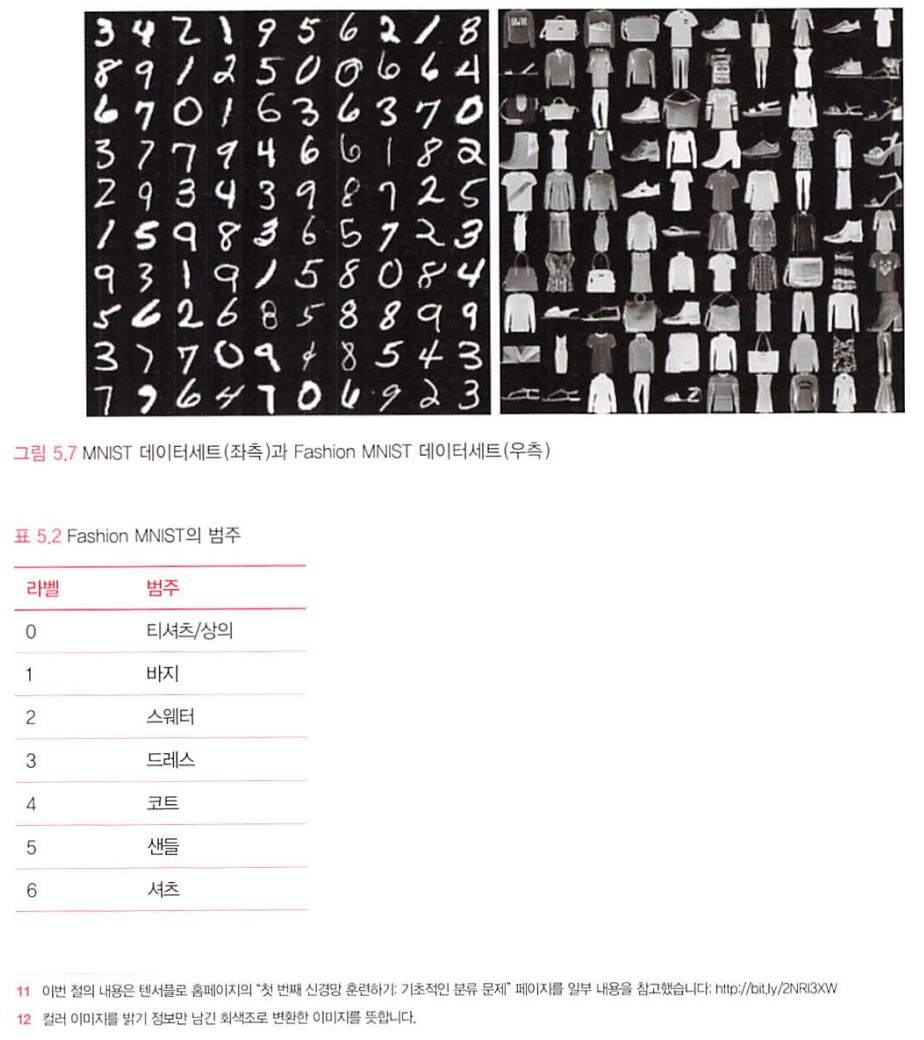

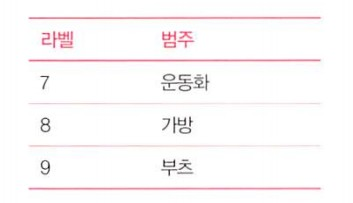

In [ ]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


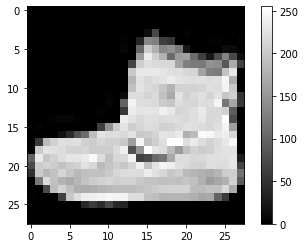

9


In [ ]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

matplotlib.pyplot의 plt.imshow() 함수로 이미지를 그래프의 형태로 표시할수 있다. 3행의 colorbar()함수는 그래프 옆에 색상의 값 정보를 바 형태로 표시한다.
데이터 이미지가 0에서 255까지의 값을 가지는 28*28 픽셀크기의 2차원 이미지라는 것을 확인 할수있다.

정답이 되는 라벨을 확인하기 위해 6행의 pritn문을 실행하면 첫번째 데이터의 라벨로 9가 표시된다. 표 5.2에서 9에 해당하는 범주는 부츠로 정답이다.

In [ ]:
# 5.21 데이터 정규화
train_X = train_X / 255.0 #minmax_norm
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

모든 값이 0에서 1 사이값을 갖기 때무네 데이터 정규화가 잘됬다.

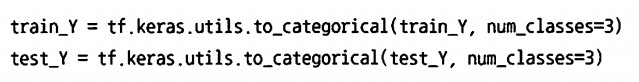

to_categorical함수를 이용해 정답 행렬을 원-핫 인코딩 하는 부분이다.
하지만 MNIST에서는 비효율적이다. 9는 [0,0,0,0,0,0,0,0,1]로 표시해야 한다. 대부분의 값이 0인 행렬을 희소행렬(sparse matrix)라고 한다. 행렬이 클수록 0을 위한 메모리를 확보하는 것은 낭비다. 그래서 0이 아닌 숫자가 있는 위치와 그 숫자의 값만 저장하는 것이다.

[0,0,0,0,0,0,0,0,0,1] 대신 9 로 표시해도 같은 정보를 표현 할수있다. train_Y test_Y에서 이미 정보를 이렇게 표현하고 있기 때문에 별도의 변환이 필요없다. 

원-핫 인코딩이 아닌 이러한 데이터를 받기 위해서 간단한 수정이 필요하다

In [ ]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # 2차원배열을 일자로 펴주기 위해 사용
    tf.keras.layers.Dense(units=128, activation='relu'), ##1차원 배열
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


원-핫 인코딩이 아닌 정답 행렬을 처리하는 부분은 compile함수의 loss에 들어가는 인수다. categorical_crossentropy앞에 sparse가 추가 됐다. Sparse는 희소행렬을 의미한다. sparse_categorical_crossentropy를 쓰면 별도의 데이터 전처리 없이 희소 행렬을 나타내는 데이터를 정답행렬로 사용할수있다.

원본이 28*28의 2차원 array 이기 때문에 데이터를 일렬로 정렬 하기 위해 Flatten이라는 레이어를 사용했다. 이 레이어는 다차원을 1차원으로 정렬하는 역할을 한다. 2개의 Dense레이어를 통과해서 예측이 출력된다. 마지막 레이어의 뉴런 수가 정답 범주의 수와 같은 10개다.

In [ ]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5214 - accuracy: 0.8166 - val_loss: 0.4426 - val_accuracy: 0.8446
Epoch 2/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3933 - accuracy: 0.8575 - val_loss: 0.3897 - val_accuracy: 0.8584
Epoch 3/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3498 - accuracy: 0.8730 - val_loss: 0.4194 - val_accuracy: 0.8467
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3217 - accuracy: 0.8826 - val_loss: 0.3762 - val_accuracy: 0.8653
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3028 - accuracy: 0.8891 - val_loss: 0.3364 - val_accuracy: 0.8786
Epoch 6/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2874 - accuracy: 0.8943 - val_loss: 0.3661 - val_accuracy: 0.8683
Epoch 7/25
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.9000 - val_loss: 0.3343 - val_accuracy:

훈련 데이터의 정확도는 점점 증가하는 것에 비해 검증 데이터의 정확도는 일정하게 유지된다.

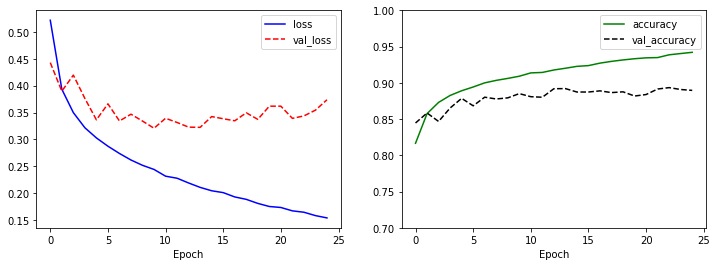

In [ ]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1) 
plt.plot(history.history['loss'], 'b-', label='loss') ##history??
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

검증 데이터의 손실이 감소하다가 서서히 증가하는 과적합 현상을 확인할수있다. 이를 막기위해 tf.keras.callbacks.EarlyStopping를 사용할수있다.

In [ ]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8825


[0.40460270643234253, 0.8824999928474426]

네트워크 구조 변경과 다른 학습 기법을 사용해서 90%이상으로 끌어 올릴 수있다.

파이프라인

1.   데이터로드

1.   데이터 전처리

1.   모델정의
2.   모델 컴파일
2.   모델 학습
2.   모델 검증/예측

